In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pds
import os
import glob
from multiprocessing import dummy
%matplotlib inline

In [ ]:
%%sh 
cd /home/jeandet/Documents/DATA
ls *.csv | parallel 'sed -e "s/,/;/2" {} > {}.fixed'
cd -

In [2]:
cal=pds.DataFrame(columns=["CH1","CH2"])
zero=pds.DataFrame(columns=["CH1","CH2"])
for cur in ["10mA","50mA","100mA","400mA"]:
    df=pds.read_csv("/home/jeandet/Documents/DATA/BOOT_CUR_REF_{}.txt.csv.fixed".format(cur),
                      sep=";",
                      skiprows=[0,1,2,3,4],
                      names=["CH1","CH2"],
                      decimal=",")
    cur=float(cur[:-2])/1e3
    cal.loc[cur]=df[int(1e7):].mean()
    zero.loc[cur]=df[:int(6e6)].mean()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f13b4456320>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f13b419b438>], dtype=object)

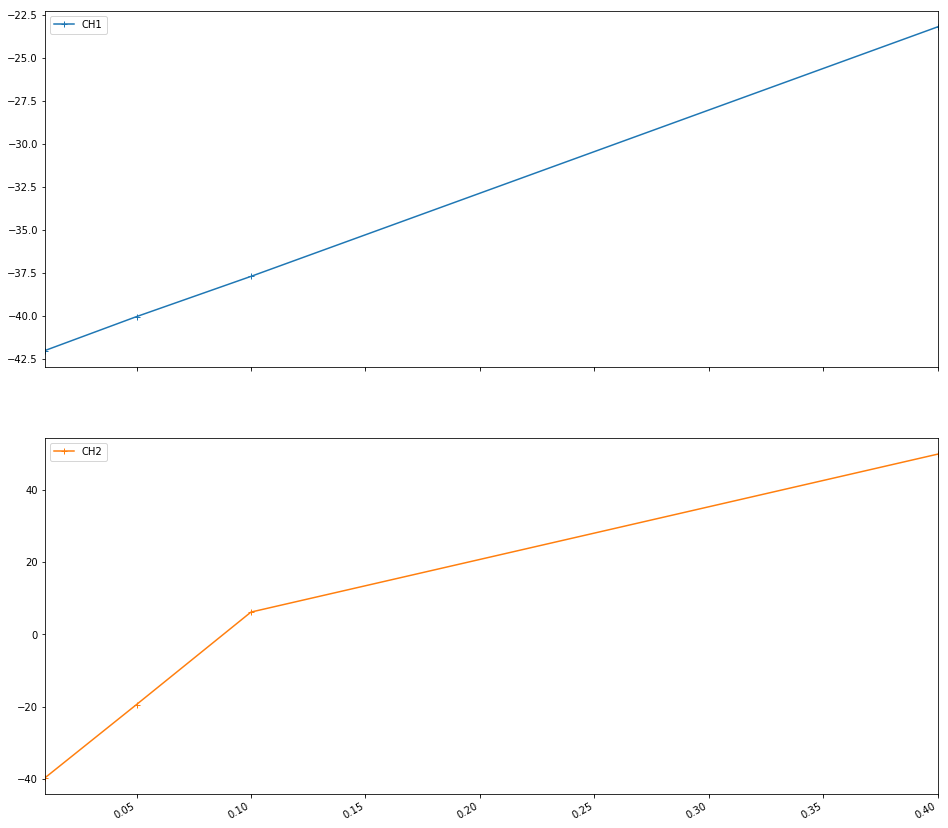

In [3]:
cal.plot(marker='+',subplots=True,figsize=(16,16))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f13b40bf5f8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f13b40167b8>], dtype=object)

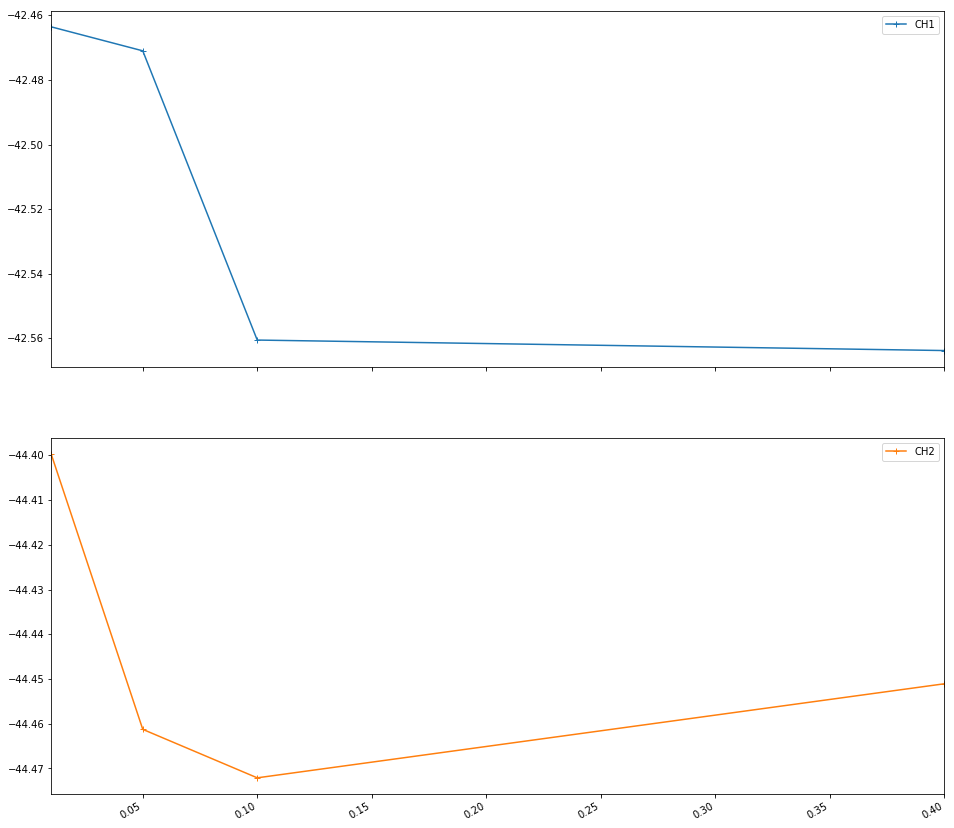

In [4]:
zero.plot(marker='+',subplots=True,figsize=(16,16))

In [5]:
slopes=(cal.iloc[-2]-cal.iloc[0])/(0.1-0.01)
offsets=zero.mean()
slopes,offsets

(CH1     47.944705
 CH2    509.702199
 dtype: float64, CH1   -42.514737
 CH2   -44.446032
 dtype: float64)

In [22]:
pool = dummy.Pool(3)

In [21]:
files=glob.glob("/home/jeandet/Documents/DATA/BOOT_CUR_*C_*V.txt.csv.fixed")
def calibrate(file,slopes):
    if not os.path.isfile(file+".calibrated"):
        calibrated=pds.read_csv(file,
                      sep=";",
                      skiprows=[0,1,2,3,4],
                      names=["CH1","CH2"],
                      decimal=",")
        localOffset=calibrated.iloc[:100000].mean()
        calibrated= (calibrated - localOffset) / (slopes*1e-3)
        calibrated.to_csv(file+".calibrated",sep="\t",index=False,float_format='%.3f',chunksize=4*1000*1000)
        
numFiles=len(files)
pool.starmap_async(calibrate,zip(files,[slopes]*numFiles))



In [23]:
%%sh 
cd /home/jeandet/Documents/DATA
ls *.calibrated | parallel 'zip {}.zip  {}'
cd -

  adding: BOOT_CUR_40C_2.1V.txt.csv.fixed.calibrated (deflated 89%)
  adding: BOOT_CUR_40C_2.0V.txt.csv.fixed.calibrated (deflated 89%)
  adding: BOOT_CUR_40C_2.2V.txt.csv.fixed.calibrated (deflated 89%)
  adding: BOOT_CUR_30C_2.2V.txt.csv.fixed.calibrated (deflated 89%)
  adding: BOOT_CUR_50C_1.9V.txt.csv.fixed.calibrated (deflated 89%)
  adding: BOOT_CUR_30C_2.1V.txt.csv.fixed.calibrated (deflated 89%)
  adding: BOOT_CUR_40C_2.05V.txt.csv.fixed.calibrated (deflated 89%)
  adding: BOOT_CUR_40C_1.9V.txt.csv.fixed.calibrated (deflated 89%)
  adding: BOOT_CUR_50C_2.05V.txt.csv.fixed.calibrated (deflated 89%)
  adding: BOOT_CUR_50C_2.1V.txt.csv.fixed.calibrated (deflated 89%)
  adding: BOOT_CUR_60C_1.9V.txt.csv.fixed.calibrated (deflated 89%)
  adding: BOOT_CUR_50C_2.0V.txt.csv.fixed.calibrated (deflated 89%)
  adding: BOOT_CUR_60C_2.0V.txt.csv.fixed.calibrated (deflated 89%)
  adding: BOOT_CUR_60C_2.1V.txt.csv.fixed.calibrated (deflated 89%)
  adding: BOOT_CUR_60C_2.05V.txt.csv.fixed.cal